
Financial inclusion remains one of the main obstacles to economic and human development in Africa. For example, across Kenya, Rwanda, Tanzania, and Uganda only 9.1 million adults (or 14% of adults) have access to or use a commercial bank account.

The objective of this competition is to create a machine learning model to predict which individuals are most likely to have or use a bank account. The models and solutions developed can provide an indication of the state of financial inclusion in Kenya, Rwanda, Tanzania and Uganda, while providing insights into some of the key factors driving individuals’ financial security.

Source: https://zindi.africa/competitions/financial-inclusion-in-africa

# 1 Import relevant dataset and libraries

In [ ]:
# Importing relevant python libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Loading the dataset

df = pd.read_csv('Dataset.csv')

## Becoming one with the data

In [ ]:
# Previewing a sample of the dataset

df.sample(n=10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
18608,Tanzania,2017,uniqueid_3806,No,Rural,Yes,3,20,Male,Other relative,Divorced/Seperated,Tertiary education,Remittance Dependent
15159,Tanzania,2017,uniqueid_357,No,Urban,Yes,2,31,Female,Spouse,Single/Never Married,Primary education,Informally employed
14061,Rwanda,2016,uniqueid_7994,No,Urban,Yes,4,28,Female,Spouse,Married/Living together,Primary education,Informally employed
12390,Rwanda,2016,uniqueid_6323,No,Rural,Yes,2,67,Female,Head of Household,Widowed,No formal education,Remittance Dependent
5182,Kenya,2018,uniqueid_5183,No,Rural,Yes,9,17,Female,Child,Single/Never Married,Secondary education,Remittance Dependent
15162,Tanzania,2017,uniqueid_360,No,Urban,No,2,25,Female,Spouse,Single/Never Married,Primary education,Informally employed
1157,Kenya,2018,uniqueid_1158,No,Urban,Yes,4,20,Male,Child,Single/Never Married,Vocational/Specialised training,Self employed
21427,Uganda,2018,uniqueid_5,No,Urban,Yes,9,18,Female,Parent,Single/Never Married,Secondary education,Other Income
19281,Tanzania,2017,uniqueid_4479,No,Urban,Yes,1,32,Female,Head of Household,Married/Living together,Primary education,Self employed
8583,Rwanda,2016,uniqueid_2516,No,Rural,Yes,2,66,Male,Head of Household,Married/Living together,No formal education,Farming and Fishing


In [ ]:
# Determining the number of records in the dataset

df.shape

(23524, 13)

In [ ]:
# Checking whether each column has an appropriate datatype

df.dtypes

country                   object
year                       int64
uniqueid                  object
bank_account              object
location_type             object
cellphone_access          object
household_size             int64
age_of_respondent          int64
gender_of_respondent      object
relationship_with_head    object
marital_status            object
education_level           object
job_type                  object
dtype: object

In [ ]:
# Checking the number of unique records in each column

df.nunique()

country                      4
year                         3
uniqueid                  8735
bank_account                 2
location_type                2
cellphone_access             2
household_size              20
age_of_respondent           85
gender_of_respondent         2
relationship_with_head       6
marital_status               5
education_level              6
job_type                    10
dtype: int64

In [ ]:
# Checking for null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [ ]:
# Getting a summary of the data

df.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


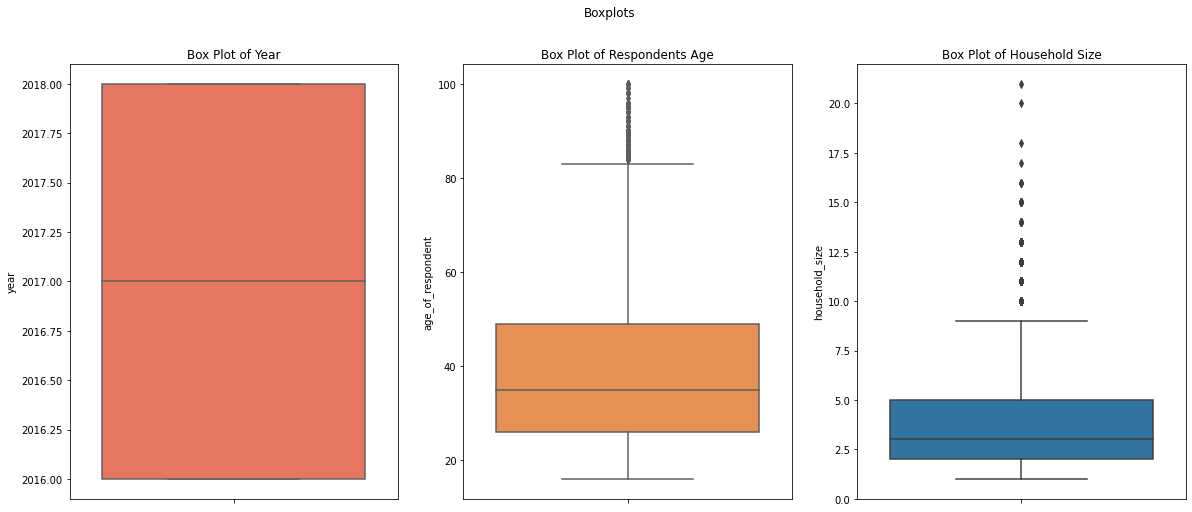

In [ ]:
# Using box plots to check for potential outliers and the skewness of the data

fig, ax = plt.subplots(1,3, figsize=(20,8))
fig.suptitle('Boxplots')

sns.boxplot(data=df, y = "year", ax=ax[0], palette="Reds")
ax[0].set_title('Box Plot of Year')

sns.boxplot(data=df, y = "age_of_respondent", ax=ax[1], palette="Oranges")
ax[1].set_title('Box Plot of Respondents Age')

sns.boxplot(data=df, y = "household_size", ax=ax[2])
ax[2].set_title('Box Plot of Household Size')

plt.show()

The age of respondents has a few outliners.

The household size box plot suggest that the household size are relatively close with each other. 

In [ ]:
# Checking for missing data

np.count_nonzero(df.isnull())
df.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

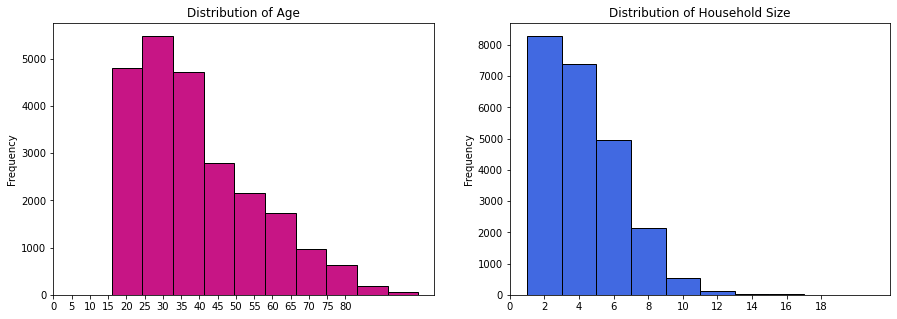

In [ ]:
# Plotting a histogram to show the distribution of age and household size 

fig, ax=plt.subplots(1,2,figsize=(15,5))
df['age_of_respondent'].plot.hist(ax=ax[0], bins=10, edgecolor='black', color='mediumvioletred')

ax[0].set_title('Distribution of Age')
x1 = list(range(0,85,5))
ax[0].set_xticks(x1)

df['household_size'].plot.hist(ax=ax[1], color='royalblue', bins=10, edgecolor='black')
ax[1].set_title('Distribution of Household Size')
x2 = list(range(0,20,2))
ax[1].set_xticks(x2)

plt.show()

Here we can see that a lot of the respondent's age is approximately between 16 and 42.

And most household size falls between 1 and 5 with a few outliers.

## 2 Check if the target variable is balanced

In [ ]:
# Using value_counts to check if the target is balanced 

df.value_counts('bank_account')

bank_account
No     20212
Yes     3312
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Bank Account Status')

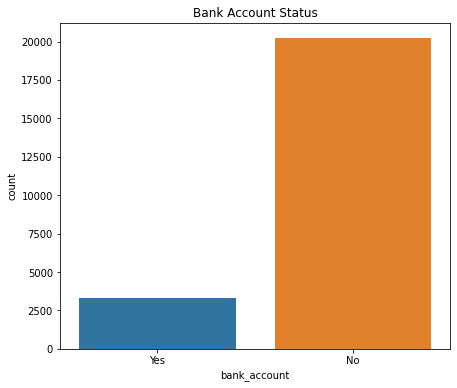

In [ ]:
# Using bar chart to check if the target is balanced 

fig, ax = plt.subplots(1, 1, figsize=(7, 6))
sns.countplot('bank_account', data=df, ax=ax)
ax.set_title('Bank Account Status')

### We can see clearly that the dataset is imbalanced.
### It is important to use a balanced dataset.
### I will be using SMOTE method from sklearn.utils to oversample the minority class (later)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


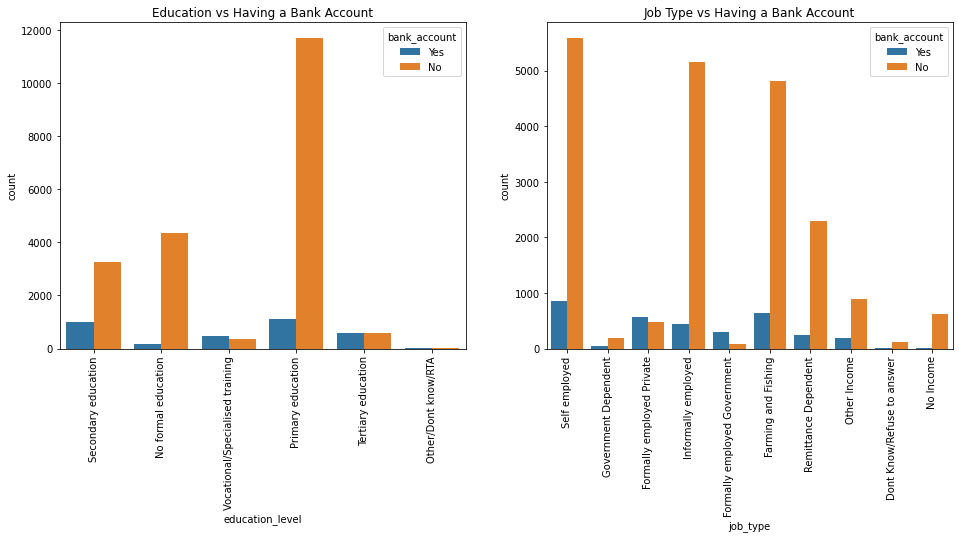

In [ ]:
# Comparing education level and Job Type vs having a bank account


fig,ax=plt.subplots(1,2,figsize=(16,6))

sns.countplot('education_level',hue='bank_account',data=df,ax=ax[0])
ax[0].set_title('Education vs Having a Bank Account')


sns.countplot('job_type',hue='bank_account',data=df,ax=ax[1])
ax[1].set_title('Job Type vs Having a Bank Account')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


plt.show()

In [ ]:
# Our models will be expecting numerical features; we need to change some categorical features to numeric

encode = {"bank_account": {"Yes":1, "No":0}, 
          "gender_of_respondent": {"Male":1, "Female":0},
          "cellphone_access":{"Yes":1,"No":0}, 
          "location_type": {"Rural":1, "Urban":0},
          "education_level":{"No formal education":0,"Primary education":1, "Secondary education":2,
                              "Vocational/Specialised training":3,"Tertiary education":4, "Other/Dont know/RTA":5},
          "relationship_with_head":{"Head of Household":0, "Child":1, "Parent":2,
                            "Spouse":3, "Other relative":4, "Other non-relatives":5}, 
          "marital_status":{"Married/Living together":0, "Single/Never Married":1, "Divorced/Seperated":2,
                            "Widowed":3, "Dont know":4}}

In [ ]:
df.replace(encode, inplace = True)
df.sample(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
4785,Kenya,2018,uniqueid_4786,1,0,1,4,34,0,3,0,3,Remittance Dependent
2476,Kenya,2018,uniqueid_2477,1,1,1,2,79,1,0,3,1,Farming and Fishing
5220,Kenya,2018,uniqueid_5221,1,0,1,6,29,0,3,0,2,Informally employed
11691,Rwanda,2016,uniqueid_5624,0,1,1,6,38,0,3,0,1,Farming and Fishing
8977,Rwanda,2016,uniqueid_2910,0,1,1,7,31,1,0,0,1,Farming and Fishing
6977,Rwanda,2016,uniqueid_910,0,1,1,4,23,0,3,0,1,Remittance Dependent
14719,Rwanda,2016,uniqueid_8667,0,1,1,3,30,0,3,0,1,Farming and Fishing
712,Kenya,2018,uniqueid_713,1,0,1,1,25,0,0,1,2,Formally employed Government
8094,Rwanda,2016,uniqueid_2027,0,1,1,4,26,0,3,0,1,Other Income
2125,Kenya,2018,uniqueid_2126,1,0,1,5,22,1,1,1,4,Remittance Dependent


In [ ]:
df.sample(5)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
195,Kenya,2018,uniqueid_196,0,1,0,5,18,0,1,1,2,Remittance Dependent
10719,Rwanda,2016,uniqueid_4652,0,1,1,3,20,1,1,1,2,Farming and Fishing
18516,Tanzania,2017,uniqueid_3714,0,0,0,2,58,1,0,1,1,Self employed
445,Kenya,2018,uniqueid_446,0,1,1,4,46,0,0,3,1,Farming and Fishing
8864,Rwanda,2016,uniqueid_2797,0,1,1,9,45,0,3,0,2,Farming and Fishing


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.3+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  int64 
 4   location_type           23524 non-null  int64 
 5   cellphone_access        23524 non-null  int64 
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  int64 
 9   relationship_with_head  23524 non-null  int64 
 10  marital_status          23524 non-null  int64 
 11  education_level         23524 non-null  int64 
 12  job_type                23524 non-null  object
dtypes: int64(10), object(3)
memory usage: 2.3+ MB


In [ ]:
# Dropping unncessary columns

df.drop(['uniqueid', 'country', 'job_type', 'year', ], axis=1, inplace=True)

In [ ]:
df.sample(10)

,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level
13048,0,1,1,6,17,0,1,1,1
17553,0,0,1,1,42,0,0,0,1
10192,0,1,0,7,16,0,1,1,2
17453,1,1,1,2,42,1,0,1,4
21610,0,1,1,12,18,1,2,1,1
12907,0,1,1,4,25,0,3,0,1
9861,1,0,1,8,75,0,2,3,1
15970,1,1,1,1,28,1,0,2,4
122,1,0,1,7,53,0,0,0,4
14776,0,1,1,4,42,1,0,0,0


In [ ]:
# Preprocessing

# The first preprocessing step is to divide the dataset into a feature set and corresponding labels. 
# We can store the feature sets into the X variable 
# and the series of corresponding labels in to the y variable

X = df.drop('bank_account', 1)
y = df['bank_account']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  import sys


## Preprocessing
### Creating the feature set (X) and labels (y)

In [ ]:
X.shape

(23524, 8)

In [ ]:
y.shape

(23524,)

In [ ]:
X.head()

,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level
0,1,1,3,24,0,3,0,2
1,1,0,5,70,0,0,3,0
2,0,1,5,26,1,4,1,3
3,1,1,5,34,0,0,0,1
4,0,0,8,26,1,1,1,1


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int64

In [ ]:
# Splitting the dataset into the Training set and Test set
# we shall define the size of the test data as 20% of entire dataset

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))
  
# import SMOTE module from imblearn library
# pip install imblearn (if you don't have imblearn in your system)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 2670
Before OverSampling, counts of label '0': 16149 

After OverSampling, the shape of train_X: (32298, 8)
After OverSampling, the shape of train_y: (32298,) 

After OverSampling, counts of label '1': 16149
After OverSampling, counts of label '0': 16149


In [ ]:
# Using the StandardScaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Scaling the resampled training set
X_train_res = sc.fit_transform(X_train_res)

## Model Training
### We will be comparing 3 models (Random Forest, Decision Tree and XGBoost)
### We will also be comparing the accuracy against the imbalanced and balanced dataset

In [ ]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import xgboost as xgb

In [ ]:
## Helper function

from sklearn.metrics import precision_recall_fscore_support

y = np.random.randint(low=0, high=10, size=100)
y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_true, y_prd, title=" ", figsize=(7, 7), ax=None):

    plt.figure(figsize=figsize)
    plt.title('Classification Report: {0}'.format(title))

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_true))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_true, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])

    rep = np.insert(rep, rep.shape[0], avg, axis=0)
    rep = np.round(rep, decimals = 2) 

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                cmap="Reds", 
                square=True,
                xticklabels=xticks, 
                yticklabels=yticks,
                fmt='g',
                ax=ax)

# Random Forest Classification

In [ ]:
rfc_classifier = RandomForestClassifier(max_depth=2, random_state=0)
rfc_classifier.fit(X_train, y_train)

# Predicting the Test set results
rfc_pred = rfc_classifier.predict(X_test)

In [ ]:
# Checking the accuracy

cm_rfc = confusion_matrix(y_test, rfc_pred)
print(cm_rfc)

print('\n Accuracy of Random Forest = {:.2f} \n\n'.format(accuracy_score(y_test, rfc_pred)))

# print classification report
print(classification_report(y_test, rfc_pred))

[[4063    0]
 [ 642    0]]

 Accuracy of Random Forest = 0.86 


              precision    recall  f1-score   support

           0       0.86      1.00      0.93      4063
           1       0.00      0.00      0.00       642

    accuracy                           0.86      4705
   macro avg       0.43      0.50      0.46      4705
weighted avg       0.75      0.86      0.80      4705



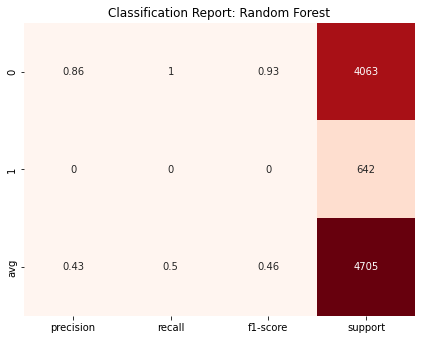

In [ ]:
plot_classification_report(y_test, rfc_pred,"Random Forest")

### The accuracy is 86% but you will notice that recall and precision of the minority class is 0%.

This proves that the model is more biased towards majority class; this means that this is not the best model.

## Checking the accuracy using the balanced dataset.



In [ ]:
rfc_classifier_res = RandomForestClassifier(max_depth=2, random_state=0)
rfc_classifier_res.fit(X_train_res, y_train_res.ravel())

# Predicting the Test set results
rfc_pred_res = rfc_classifier_res.predict(X_test)

In [ ]:
# Checking the accuracy

cm_rfc_res = confusion_matrix(y_test, rfc_pred_res)
print(cm_rfc_res)

print('\n Accuracy of Random Forest on resampled dataset = {:.2f} \n'.format(accuracy_score(y_test, rfc_pred_res)))

# print classification report
print(classification_report(y_test, rfc_pred_res))

[[3312  751]
 [ 205  437]]

 Accuracy of Random Forest on resampled dataset = 0.80 

              precision    recall  f1-score   support

           0       0.94      0.82      0.87      4063
           1       0.37      0.68      0.48       642

    accuracy                           0.80      4705
   macro avg       0.65      0.75      0.68      4705
weighted avg       0.86      0.80      0.82      4705



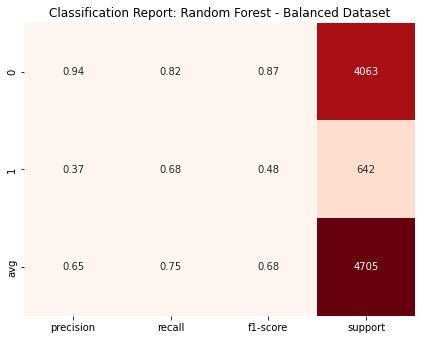

In [ ]:
plot_classification_report(y_test, rfc_pred_res,"Random Forest - Balanced Dataset")

### The accuracy has reduced to 80% as compared to previous model but the precision and recall value of minority class has also improved to 37% and 68% respectively. 

### This is a good model compared to the previous one. 


## Visualising the confusion matrix

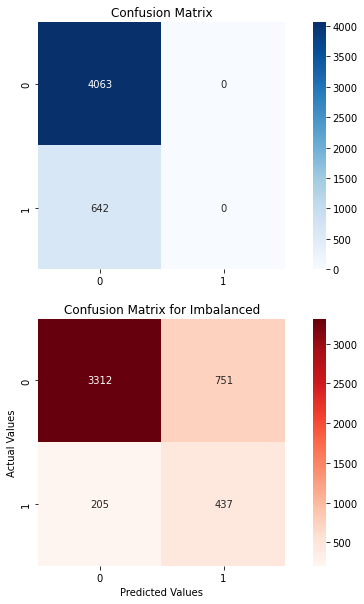

In [ ]:
fig, ax=plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Confusion Matrix')
ax[1].set_title('Confusion Matrix for Imbalanced')

ax[0].set_ylabel('Actual Values')
ax[1].set_ylabel('Actual Values')

ax[0].set_xlabel('Predicted Values')
ax[1].set_xlabel('Predicted Values')

sns.heatmap(cm_rfc, annot=True, cmap="Blues", square=True, fmt='g', ax=ax[0])
sns.heatmap(cm_rfc_res, annot=True, cmap="Reds", square=True, fmt='g', ax=ax[1])

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## We will run the same process for Decision Tree and XGBoost

# DecisionTree Classification

In [ ]:
dtc = tree.DecisionTreeClassifier(max_depth=3) 
dtc = dtc.fit(X_train, y_train)

# Predicting the Test set results
dtc_pred = dtc.predict(X_test)

In [ ]:
cm_dtc = confusion_matrix(y_test, dtc_pred)
print(cm_dtc)

print('\n Accuracy of DTC = {:.2f} \n\n'.format(accuracy_score(y_test, dtc_pred)))

# print classification report
print(classification_report(y_test, dtc_pred))

[[3954  109]
 [ 447  195]]

 Accuracy of DTC = 0.88 


              precision    recall  f1-score   support

           0       0.90      0.97      0.93      4063
           1       0.64      0.30      0.41       642

    accuracy                           0.88      4705
   macro avg       0.77      0.64      0.67      4705
weighted avg       0.86      0.88      0.86      4705



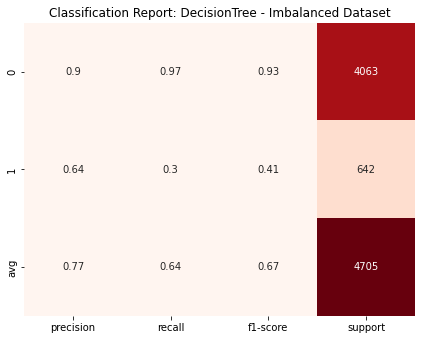

In [141]:
plot_classification_report(y_test, dtc_pred,"DecisionTree - Imbalanced Dataset")

### Checking the accuracy using the balanced dataset for Decision Tree

In [ ]:
dtc_classifier_res = tree.DecisionTreeClassifier(max_depth=3) 
dtc_classifier_res = dtc.fit(X_train_res, y_train_res.ravel())

# Predicting the Test set results
dtc_pred_res = dtc_classifier_res.predict(X_test)

In [ ]:
cm_dtc_res = confusion_matrix(y_test, dtc_pred_res)
print(cm_dtc_res)

print('\n Accuracy of Decision Tree on resampled dataset = {:.2f} \n\n'.format(accuracy_score(y_test, dtc_pred_res)))

# print classification report
print(classification_report(y_test, dtc_pred_res))

[[2848 1215]
 [ 168  474]]

 Accuracy of Decision Tree on resampled dataset = 0.71 


              precision    recall  f1-score   support

           0       0.94      0.70      0.80      4063
           1       0.28      0.74      0.41       642

    accuracy                           0.71      4705
   macro avg       0.61      0.72      0.61      4705
weighted avg       0.85      0.71      0.75      4705



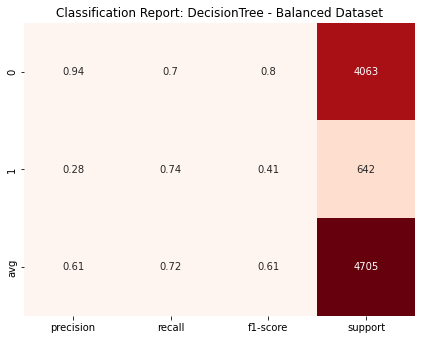

In [142]:
plot_classification_report(y_test, dtc_pred_res,"DecisionTree - Balanced Dataset")

## Visualising the Confusion matrix

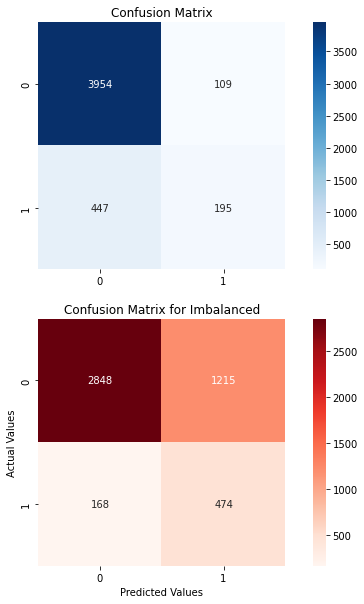

In [ ]:
fig, ax=plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Confusion Matrix')
ax[1].set_title('Confusion Matrix for Imbalanced')

ax[0].set_ylabel('Actual Values')
ax[1].set_ylabel('Actual Values')

ax[0].set_xlabel('Predicted Values')
ax[1].set_xlabel('Predicted Values')

sns.heatmap(cm_dtc, annot=True, cmap="Blues", square=True, fmt='g', ax=ax[0])
sns.heatmap(cm_dtc_res, annot=True, cmap="Reds", square=True, fmt='g', ax=ax[1])

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## Again, the accuracy has reduced to 71% as compared to previous model but the recall value of minority class has improved to 74%.

## This is a good model compared to the previous one.

# XGBoost

In [ ]:
XGB = xgb.XGBClassifier()
XGB.fit(X_train, y_train)

# Predicting the Test set results
xgb_pred = XGB.predict(X_test)

In [ ]:
cm_xgb = confusion_matrix(y_test, xgb_pred)
print(cm_xgb)

print('\n Accuracy of XGB = {:.2f} \n\n'.format(accuracy_score(y_test, xgb_pred)))

# print classification report
print(classification_report(y_test, xgb_pred))

[[3948  115]
 [ 429  213]]

 Accuracy of XGB = 0.88 


              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4063
           1       0.65      0.33      0.44       642

    accuracy                           0.88      4705
   macro avg       0.78      0.65      0.69      4705
weighted avg       0.87      0.88      0.87      4705



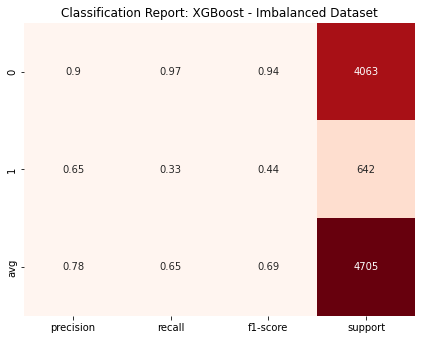

In [143]:
plot_classification_report(y_test, xgb_pred,"XGBoost - Imbalanced Dataset")

### Checking the accuracy using the balanced dataset for Decision Tree

In [ ]:
XGB_res = xgb.XGBClassifier()
XGB_res.fit(X_train_res, y_train_res.ravel())

# Predicting the Test set results
xgb_pred_res = XGB_res.predict(X_test)

In [ ]:
cm_xgb_res = confusion_matrix(y_test, xgb_pred_res)
print(cm_xgb_res)

print('\n Accuracy of XGB = {:.2f} \n\n'.format(accuracy_score(y_test, xgb_pred_res)))

# print classification report
print(classification_report(y_test, xgb_pred_res))

[[3119  944]
 [ 196  446]]

 Accuracy of XGB = 0.76 


              precision    recall  f1-score   support

           0       0.94      0.77      0.85      4063
           1       0.32      0.69      0.44       642

    accuracy                           0.76      4705
   macro avg       0.63      0.73      0.64      4705
weighted avg       0.86      0.76      0.79      4705



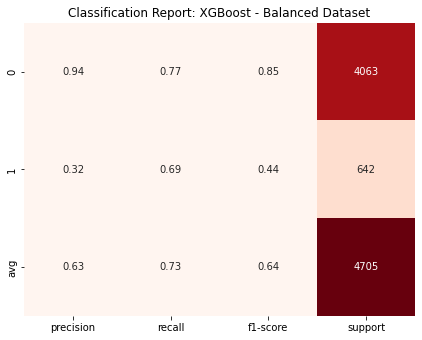

In [144]:
plot_classification_report(y_test, xgb_pred_res,"XGBoost - Balanced Dataset")

## Yet again, the accuracy has reduced to 76% as compared to previous model but the recall value of minority class has improved to 69%.

## This is a good model compared to the previous one.

## Visualizing the confusion matrix

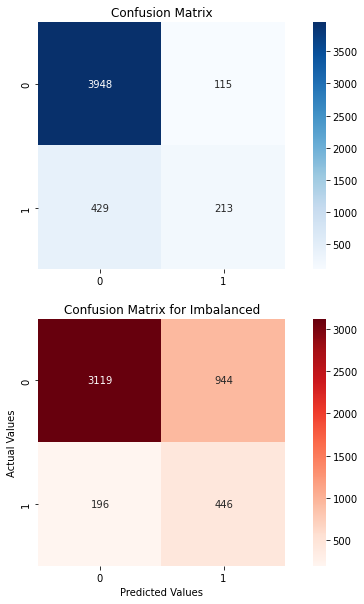

In [ ]:
fig, ax=plt.subplots(2, 1, figsize=(10, 10))

ax[0].set_title('Confusion Matrix')
ax[1].set_title('Confusion Matrix for Imbalanced')

ax[0].set_ylabel('Actual Values')
ax[1].set_ylabel('Actual Values')

ax[0].set_xlabel('Predicted Values')
ax[1].set_xlabel('Predicted Values')

sns.heatmap(cm_xgb, annot=True, cmap="Blues", square=True, fmt='g', ax=ax[0])
sns.heatmap(cm_xgb_res, annot=True, cmap="Reds", square=True, fmt='g', ax=ax[1])

plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

plt.show()

## Side by side comparision of the models

In [ ]:
print("Models accuracies on imbalanced dataset.")
print("*" * 40)

print('\nRandom Forest = {:.2f} \n'.format(accuracy_score(y_test, rfc_pred)))
print('Decision Tree = {:.2f} \n'.format(accuracy_score(y_test, dtc_pred)))
print('XGBoost = {:.2f} \n'.format(accuracy_score(y_test, xgb_pred)))

Models accuracies on imbalanced dataset.
****************************************

Random Forest = 0.86 

Decision Tree = 0.88 

XGBoost = 0.88 



In [ ]:
print("Models accuracies on balanced dataset.")
print("*" * 40)

print('\nRandom Forest = {:.2f} \n'.format(accuracy_score(y_test, rfc_pred_res)))
print('Decision Tree = {:.2f} \n'.format(accuracy_score(y_test, dtc_pred_res)))
print('XGBoost = {:.2f} \n'.format(accuracy_score(y_test, xgb_pred_res)))

Models accuracies on balanced dataset.
****************************************

Random Forest = 0.80 

Decision Tree = 0.71 

XGBoost = 0.76 



View on [Medium](https://medium.com/@ajosegun_/financial-inclusion-in-east-africa-using-machine-learning-to-predict-which-individuals-are-most-be1d0a84b0ee)